### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

# Reducers
from typing import Annotated
from langgraph.graph.message import add_messages



/Users/binod.kafle/Documents/personal/learning/agentic_ai/.venv/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [5]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke()

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [6]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="groq/compound")
llm_groq.invoke("Hey I am Binod and I like to play cricket")

AIMessage(content='Hey Binod! Nice to meet you. Cricket’s a great game—what’s your favorite format or team?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 88, 'prompt_tokens': 252, 'total_tokens': 340, 'completion_time': 0.186211, 'prompt_time': 0.047556, 'queue_time': 0.134011, 'total_time': 0.233767}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--fdeec55f-485f-4969-ae2d-5ff0a03b01ce-0', usage_metadata={'input_tokens': 252, 'output_tokens': 88, 'total_tokens': 340})

### We will start with creating Nodes

In [13]:
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

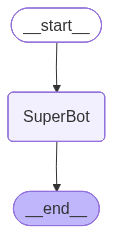

In [14]:
graph = StateGraph(State)

graph.add_node("SuperBot", superbot)

graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile()
# view
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [15]:
# Invocation
graph_builder.invoke({"messages": "Hi my name is Binod and I like cricket"})

{'messages': [HumanMessage(content='Hi my name is Binod and I like cricket', additional_kwargs={}, response_metadata={}, id='6c7aebc3-eabf-4df4-9d6c-510559c4ab84'),
  AIMessage(content='Hi Binod! Nice to meet you. 😊  \nCricket’s a great sport—do you have a favorite team or player?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 250, 'total_tokens': 325, 'completion_time': 0.157187, 'prompt_time': 0.007838, 'queue_time': 0.102587, 'total_time': 0.165024}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--2d740474-0f42-4236-8403-2dfd92477fb5-0', usage_metadata={'input_tokens': 250, 'output_tokens': 75, 'total_tokens': 325})]}

### Streaming the responses

In [18]:
for event in graph_builder.stream({"messages":"Hello My name is Binod"}, stream_mode="updates"):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello, Binod! Nice to meet you. How can I help you today?', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 242, 'total_tokens': 311, 'completion_time': 0.147075, 'prompt_time': 0.008794, 'queue_time': 0.139744, 'total_time': 0.155869}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--89d340b4-1de4-4442-b6a0-c2a67253a774-0', usage_metadata={'input_tokens': 242, 'output_tokens': 69, 'total_tokens': 311})]}}
